In [1]:
# Step 1: Required Libraries ko import karte hain
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [13]:
import kagglehub
import pandas as pd
import os

# Download the latest version of the 'iris' dataset
path = kagglehub.dataset_download("uciml/iris")
print(path)
# List all files in the directory to find the exact filename
files = os.listdir(path)
print("Files in the dataset directory:", files)
data= pd.read_csv(os.path.join(path, "Iris.csv"))
data

/root/.cache/kagglehub/datasets/uciml/iris/versions/2
Files in the dataset directory: ['database.sqlite', 'Iris.csv']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [51]:

#Standardizing the data
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler= StandardScaler()
scaler_data= scaler.fit_transform(df.drop('target', axis=1))
scaler_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [50]:
# Step 4: PCA ko apply karte hain aur 2 Principal Components extract karte hain
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaler_data)
pca_data

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

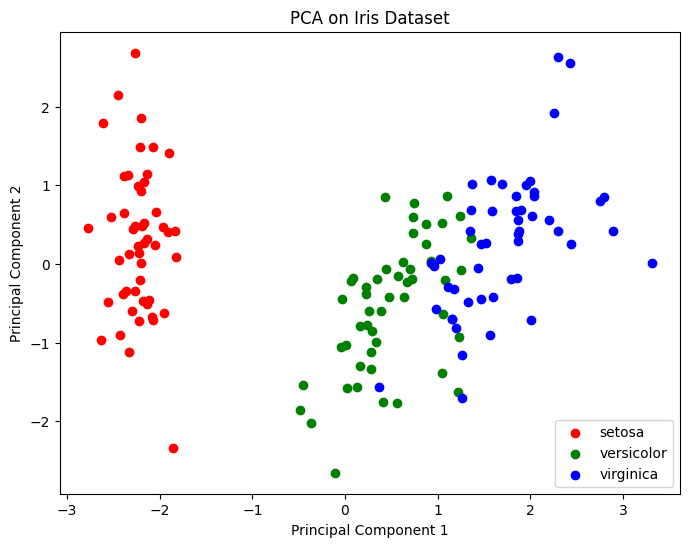

In [59]:
# Step 4: PCA ko apply karte hain aur 2 Principal Components extract karte hain
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaler_data)

# Step 5: PCA ke results ko DataFrame mein convert karte hain taaki visualize karna easy ho
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

# Step 6: Plot the 2D data using Principal Components
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = data.target_names

for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(
        pca_df[pca_df['target'] == i]['PC1'],
        pca_df[pca_df['target'] == i]['PC2'],
        color=color,
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [62]:
from sklearn.pipeline import Pipeline

pipeline= Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

pipeline.fit(X_train, y_train)
y_prep_pipeline= pipeline.predict(X_test)

# Evaluate accuracy
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"Pipeline Accuracy: {accuracy_pipeline * 100:.2f}%")

AttributeError: This 'Pipeline' has no attribute 'predict'